# Car Price Prediciton

In [475]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from bokeh.plotting import figure, show
from scipy.stats import skew,boxcox
from scipy.special import inv_boxcox
from sklearn.decomposition import PCA
from sklearn import preprocessing
sns.set_palette("bright")
%matplotlib inline

In [326]:
# audi_df  = pd.read_csv("https://raw.githubusercontent.com/overtunned/carpriceprediction/main/Dataset/audi.csv")
audi_df  = pd.read_csv("dataset/audi.csv")

In [327]:
audi_df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


### Data Preprocessing

In [328]:
audi_df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


In [329]:
audi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [330]:
audi_df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [331]:
audi_df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [332]:
# dropping tax as i dont know what it is based on.
audi_df = audi_df.drop("tax",axis=1)

In [333]:
missing = audi_df.loc[audi_df.engineSize == 0].index
audi_df.loc[missing, 'engineSize'] = audi_df["engineSize"].median()

Filling the missing values with median of that attribute

There is a high negative correlation between price and mpg and mileage.

<AxesSubplot:xlabel='model', ylabel='Count'>

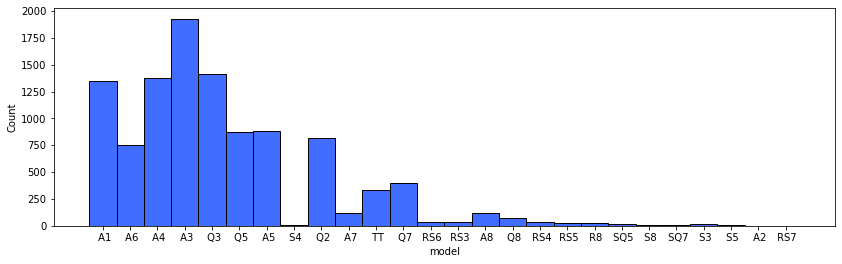

In [404]:
fig_dims = (14, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(audi_df.model,ax=ax)

<AxesSubplot:xlabel='transmission', ylabel='Count'>

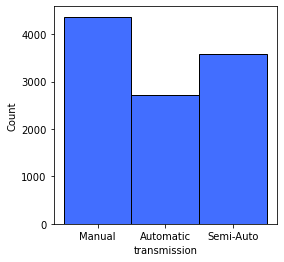

In [405]:
fig_dims = (4, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(audi_df.transmission,ax=ax)

<AxesSubplot:xlabel='fuelType', ylabel='Count'>

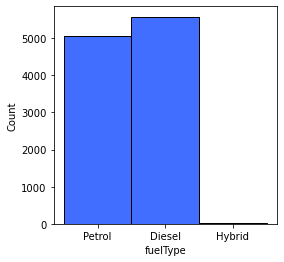

In [406]:
fig_dims = (4, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(audi_df.fuelType,ax=ax)

In [407]:
price_year = pd.DataFrame(audi_df[['year','price']].groupby('year').mean())
px.line(price_year)

Price of cars have been on the rise as the years goes by. At present, it is now at the peak of all previous year prices

In [408]:
px.scatter(audi_df,x='mileage', y = 'price')

From the above graph we can see that the price of the car decreases as the distance the car was used for increases. No car is priced more than 20k after a distance of 100k, 

In [409]:
price_mpg = pd.DataFrame(audi_df[['mpg','price']].groupby('mpg').mean())
px.scatter(price_mpg)

From the graph we can see that the value of cars having price above 50k all have a mpg below 30 which is a foot into luxuary.

In [410]:
price_engine0to2= audi_df[audi_df.engineSize<=2].price.mean()
price_engine2to4 = audi_df[(audi_df.engineSize>2) & (audi_df.engineSize<=4)].price.mean()
price_engine4to6 = audi_df[(audi_df.engineSize>4) & (audi_df.engineSize<=6)].price.mean()
plot_df = pd.DataFrame([price_engine0to2,price_engine2to4, price_engine4to6], columns=["Price_mean"],index=["engineSize0to2","engineSize2to4","engineSize4to6"])
px.bar(plot_df)

We can see that the price of a car increases as the size of the engine it uses increases.

In [411]:
mpg_engine0to2= audi_df[audi_df.engineSize<=2].mpg.mean()
mpg_engine2to4 = audi_df[(audi_df.engineSize>2) & (audi_df.engineSize<=4)].mpg.mean()
mpg_engine4to6 = audi_df[(audi_df.engineSize>2) & (audi_df.engineSize<=6)].mpg.mean()
plot_df = pd.DataFrame([mpg_engine0to2,mpg_engine2to4,mpg_engine4to6], columns=["mileage"],index=["engineSize 0 to 2","engineSize 2 to 4","engineSize 4 to 6"])
px.bar(plot_df)

The miles per gallon of the car decreases as the size of the engine increases. This is becauses it takes more fuel to power a bigger engine than a smaller one. Hence the decreases in the mpg.

### Feature Engineering

In [412]:
cat_df = audi_df[["year","model","fuelType","transmission"]].astype('category').copy()
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   year          10668 non-null  category
 1   model         10668 non-null  category
 2   fuelType      10668 non-null  category
 3   transmission  10668 non-null  category
dtypes: category(4)
memory usage: 44.2 KB


In [413]:
num_df = audi_df[['price','mileage', 'mpg','engineSize']].copy()

<AxesSubplot:>

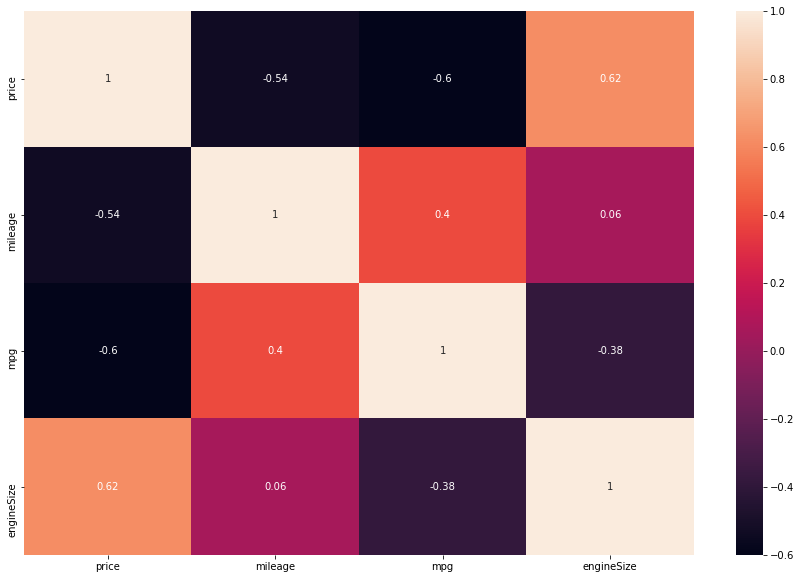

In [414]:
plt.figure(figsize = (15,10))
sns.heatmap(num_df.corr(),annot = True)

In [415]:
print("Boxcox\t\tSkew\t\t\t\tTransformed")
for i in num_df.columns:
    print("{}\t->\t{}\t->\t{}".format(i,skew(num_df[i].values),skew(boxcox(num_df[i].values)[0])))
print("Log")
for i in num_df.columns:
    print("{}\t->\t{}\t->\t{}".format(i,skew(num_df[i].values),skew(np.log1p(num_df[i].values))))

Boxcox		Skew				Transformed
price	->	2.2770028653255587	->	0.00872825516975382
mileage	->	1.5762072303535488	->	-0.09015078408269933
mpg	->	1.832601611204326	->	-0.0031723653871693867
engineSize	->	1.4562119598170369	->	-0.01327721253130936
Log
price	->	2.2770028653255587	->	-0.11472900871680033
mileage	->	1.5762072303535488	->	-1.808948759781167
mpg	->	1.832601611204326	->	0.06843022609659101
engineSize	->	1.4562119598170369	->	0.6190036858008828


In [416]:
price_lam = boxcox(num_df["price"])[1] # for transforming back the values

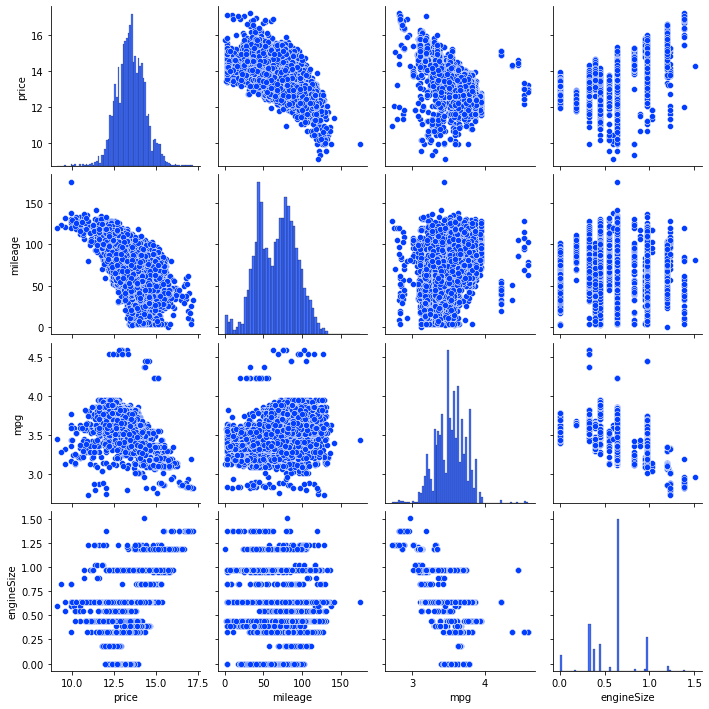

In [417]:
num_df = num_df.apply(lambda x : boxcox(x)[0])
sns.pairplot(num_df)

In [466]:
norm_df = num_df.apply(scale)

1.0000468724366893

In [470]:
df = pd.concat([cat_df,norm_df], axis = 1)
df

,year,model,fuelType,transmission,price,mileage,mpg,engineSize
0,2017,A1,Petrol,Manual,-1.049892,-0.081347,0.486385,-1.022235
1,2016,A6,Diesel,Automatic,-0.472004,0.733695,1.086509,0.280494
2,2016,A1,Petrol,Manual,-1.312827,0.528629,0.486385,-1.022235
3,2017,A4,Diesel,Automatic,-0.434172,0.381925,1.277516,0.280494
4,2019,A3,Petrol,Manual,-0.372510,-1.372938,0.033214,-2.349542
...,...,...,...,...,...,...,...,...
10663,2020,A3,Petrol,Manual,-0.409426,-1.026709,0.033214,-2.349542
10664,2020,A3,Petrol,Manual,-0.409426,-1.377382,0.033214,-2.349542
10665,2020,A3,Petrol,Manual,-0.384829,-1.810562,0.033214,-2.349542
10666,2017,Q3,Petrol,Automatic,-0.119826,-0.546903,-0.110233,-1.022235


In [471]:
final_df = pd.get_dummies(df, prefix_sep="_", drop_first=True)

In [472]:
final_df.head()

,price,mileage,mpg,engineSize,year_1998,year_2002,year_2003,year_2004,year_2005,year_2006,...,model_ S4,model_ S5,model_ S8,model_ SQ5,model_ SQ7,model_ TT,fuelType_Hybrid,fuelType_Petrol,transmission_Manual,transmission_Semi-Auto
0,-1.049892,-0.081347,0.486385,-1.022235,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,-0.472004,0.733695,1.086509,0.280494,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.312827,0.528629,0.486385,-1.022235,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,-0.434172,0.381925,1.277516,0.280494,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.372510,-1.372938,0.033214,-2.349542,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [497]:
X = final_df.iloc[:,1:]
y = final_df.iloc[:,0]

0       -1.049892
1       -0.472004
2       -1.312827
3       -0.434172
4       -0.372510
           ...   
10663   -0.409426
10664   -0.409426
10665   -0.384829
10666   -0.119826
10667   -0.536651
Name: price, Length: 10668, dtype: float64

In [498]:
pcs = PCA(.90)
pcs.fit(X)
pcs.explained_variance_ratio_

array([0.34418352, 0.21911   , 0.08705647, 0.05532716, 0.0355964 ,
       0.03139667, 0.02791095, 0.02499574, 0.0224722 , 0.01960117,
       0.01766445, 0.01556876])

In [499]:
pcsSummary = pd.DataFrame({"Standard deviation":np.sqrt(pcs.explained_variance_),"Proportion of variance": pcs.explained_variance_ratio_,
"Cumulative proportion": np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary

,Standard deviation,Proportion of variance,Cumulative proportion
0,1.352901,0.344184,0.344184
1,1.079449,0.219110,0.563294
2,0.680412,0.087056,0.650350
3,0.542426,0.055327,0.705677
4,0.435085,0.035596,0.741274
5,0.408614,0.031397,0.772670
6,0.385264,0.027911,0.800581
7,0.364589,0.024996,0.825577
8,0.345696,0.022472,0.848049
9,0.322858,0.019601,0.867650


In [501]:
pcs_df = pd.DataFrame(pcs.transform(X))
pcs_df.columns = ["PC{}".format(i) for i in range(1,len(pcs_df.columns)+1)]
pcs_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-0.905500,-1.011636,-0.287608,-0.152463,0.861157,-0.006426,0.053521,-0.002776,-0.226992,-0.228109,-0.026923,-0.087998
1,-1.101750,0.898649,0.605381,0.126042,-0.480218,0.471312,-0.018616,-0.080593,-0.252497,-0.482876,0.296018,0.128118
2,-1.256631,-0.611949,-0.571139,-0.320732,-0.344706,0.654368,0.235307,-0.134929,-0.183608,-0.258060,0.072321,-0.069852
3,-1.024448,0.625384,0.872165,0.246974,0.908288,-0.036896,-0.142341,-0.629568,-0.250162,0.300378,-0.030549,-0.161261
4,-0.253182,-2.918669,0.004735,-0.321750,-0.468393,-0.561002,0.274486,0.016211,-0.120908,0.143972,-0.114382,-0.060071
...,...,...,...,...,...,...,...,...,...,...,...,...
10663,-0.584878,-2.614142,-0.315791,-0.114994,-0.075944,-0.036605,0.699238,0.435934,0.395442,0.074613,-0.404415,-0.378412
10664,-0.401324,-2.806453,-0.128556,-0.117346,-0.025892,0.016612,0.766382,0.467636,0.408205,0.075727,-0.397289,-0.389201
10665,-0.174584,-3.044012,0.102732,-0.120251,0.035937,0.082350,0.849324,0.506798,0.423970,0.077103,-0.388486,-0.402529
10666,-0.041724,-1.164944,-0.420857,0.280614,0.787935,0.211053,-0.367076,0.480971,-0.460173,0.171630,0.331453,-0.087196


We can see that we need atleast 20 columns to retain 90 percent of the variance.

In [514]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .30, random_state = 1)
X_trainpca,X_testpca,y_train,y_test = train_test_split(pcs_df,y,test_size = .30, random_state = 1)

In [515]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

In [529]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [530]:
regressionSummary(y_train,lm.predict(X_train))


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 0.2550
            Mean Absolute Error (MAE) : 0.1963
          Mean Percentage Error (MPE) : -1.5355
Mean Absolute Percentage Error (MAPE) : 95.9140


In [531]:
regressionSummary(y_test,lm.predict(X_test))


Regression statistics

                      Mean Error (ME) : -0.0042
       Root Mean Squared Error (RMSE) : 0.2595
            Mean Absolute Error (MAE) : 0.1978
          Mean Percentage Error (MPE) : -2.6621
Mean Absolute Percentage Error (MAPE) : 98.8171


In [532]:
lm_pca = LinearRegression()
lm_pca.fit(X_trainpca, y_train)

LinearRegression()

In [533]:
regressionSummary(y_train,lm_pca.predict(X_trainpca))


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 0.4562
            Mean Absolute Error (MAE) : 0.3253
          Mean Percentage Error (MPE) : -17.7850
Mean Absolute Percentage Error (MAPE) : 138.0412


In [534]:
regressionSummary(y_test,lm_pca.predict(X_testpca))


Regression statistics

                      Mean Error (ME) : -0.0022
       Root Mean Squared Error (RMSE) : 0.4469
            Mean Absolute Error (MAE) : 0.3166
          Mean Percentage Error (MPE) : -9.2092
Mean Absolute Percentage Error (MAPE) : 140.9431
